In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from six import StringIO  
from IPython.display import Image
import matplotlib.pyplot as plt
import random
import requests
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scipy.spatial.distance import cosine
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers

import sys
import os
import json
import pandas
import numpy
import optparse
import keras


from keras.callbacks import TensorBoard
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from PIL import Image

from scipy.spatial.distance import cosine

random.seed(1242)

C:\Users\tab\Documents\Code\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load in the Data

In [4]:
# Load the data from the CSV file and drop any missing rows
animes = pd.read_csv('animes.csv')
animes['aired'] = pd.to_datetime(animes['aired'], errors = 'coerce')

# Drop any duplicates
# animes = animes.drop_duplicates()


users = pd.read_csv('profiles_modified.csv')
users['birthday'] = pd.to_datetime(users['birthday'], errors = 'coerce')

#users.isnull().sum()
#users = users.dropna()

print(animes.shape)
print(users.shape)

(19311, 12)
(81727, 6)


In [8]:
animes

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [30]:
users

,user_id,profile,gender,birthday,favorite_anime,link
0,1,DesolatePsyche,Male,1994-10-02,"['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,2,baekbeans,Female,2000-11-10,"['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,3,skrn,NaN,NaT,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,4,edgewalker00,Male,NaT,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,5,aManOfCulture99,Male,1999-10-30,"['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99
...,...,...,...,...,...,...
81722,81723,lovelessxd,Female,1992-08-06,"['853', '5114']",https://myanimelist.net/profile/lovelessxd
81723,81724,Shattered_Angel,Female,1994-09-06,"['150', '27', '1520', '121', '31452', '32995',...",https://myanimelist.net/profile/Shattered_Angel
81724,81725,FluffyWalrus,Male,NaT,"['121', '43', '237', '202', '205']",https://myanimelist.net/profile/FluffyWalrus
81725,81726,camco,Female,NaT,"['199', '4224', '7054', '13601', '14713']",https://myanimelist.net/profile/camco


### EDA

#### Animes Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   uid         19311 non-null  int64         
 1   title       19311 non-null  object        
 2   synopsis    18336 non-null  object        
 3   genre       19311 non-null  object        
 4   aired       9243 non-null   datetime64[ns]
 5   episodes    18605 non-null  float64       
 6   members     19311 non-null  int64         
 7   popularity  19311 non-null  int64         
 8   ranked      16099 non-null  float64       
 9   score       18732 non-null  float64       
 10  img_url     19131 non-null  object        
 11  link        19311 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.8+ MB
None
                uid      episodes       members    popularity        ranked  \
count  19311.000000  18605.000000  1.931100e+04  19311

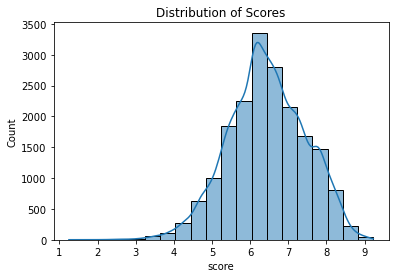

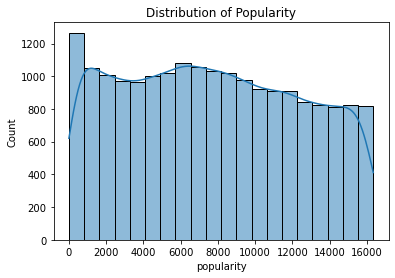

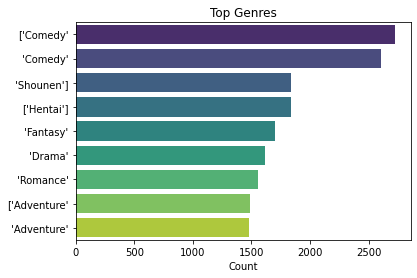

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(animes.info())

# Summary statistics of numerical columns
print(animes.describe())

# Distribution of Scores
sns.histplot(animes['score'], bins=20, kde=True)
plt.title('Distribution of Scores')
plt.show()

# Distribution of Popularity
sns.histplot(animes['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.show()

# Genres distribution
genres_count = animes['genre'].str.split(', ', expand=True).stack().value_counts()
sns.barplot(y = genres_count.index[1:10], x = genres_count[1:10], palette='viridis')
plt.title('Top Genres')
plt.xlabel('Count')
plt.show()


#### Users Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 81726
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         65125 non-null  int64         
 1   profile         65125 non-null  object        
 2   gender          48711 non-null  object        
 3   birthday        35688 non-null  datetime64[ns]
 4   favorite_anime  65125 non-null  object        
 5   link            65125 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.5+ MB
None
            user_id
count  65125.000000
mean   40200.192814
std    23585.055943
min        1.000000
25%    19765.000000
50%    39843.000000
75%    60324.000000
max    81727.000000


C:\Users\tab\Documents\Code\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


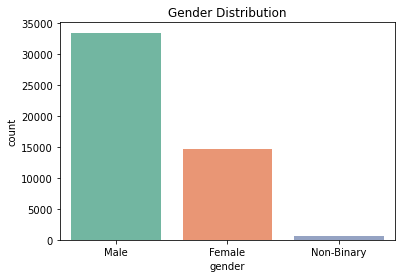

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\1960097832.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['age'] = (pd.to_datetime('today') - users['birthday']).astype('<m8[Y]')


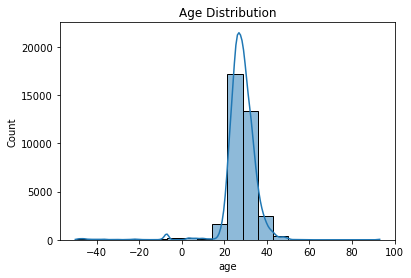

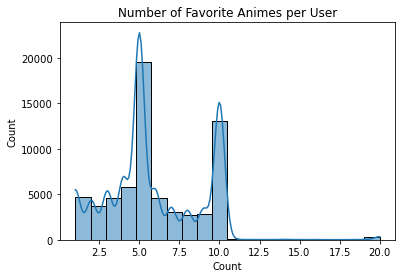

In [114]:
# Display basic information about the dataset
print(users.info())

# Summary statistics of numerical columns (if any)
print(users.describe())

# Gender distribution
sns.countplot(users['gender'], palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Age distribution (if 'birthday' is available)
users['age'] = (pd.to_datetime('today') - users['birthday']).astype('<m8[Y]')
sns.histplot(users['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Number of favorite animes per user
sns.histplot(users['favorite_anime'].apply(lambda x: len(eval(x))), bins=20, kde=True)
plt.title('Number of Favorite Animes per User')
plt.xlabel('Count')
plt.show()


### Feature Engineering and Data Prep

In [3]:
users.isnull().sum()


user_id               0
profile               0
gender            27871
birthday          42509
favorite_anime        0
link                  0
dtype: int64

#### We have some user profiles with no favorite animes listed. 

In [4]:
users[users['user_id'] == 10]

,user_id,profile,gender,birthday,favorite_anime,link
9,10,shadowsplat,NaN,NaT,[],https://myanimelist.net/profile/shadowsplat


We will omit these from our analysis since we will be comparing user profiles based on their favorited animes.

In [5]:
users = users[users['favorite_anime'] != '[]']

### Prepare a DataFrame for Modeling

In [34]:
# Extract unique anime IDs
unique_anime_ids = set(anime_id for anime_list in users['favorite_anime'] for anime_id in eval(anime_list))

# Create a new dataset with user_id and dummy variables
user_anime_dataset = users[['user_id']].copy()

for anime_id in unique_anime_ids:
    user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)


C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_anime_dataset[f'anime_{anime_id}'] = users['favorite_anime'].apply(lambda x: 1 if anime_id in eval(x) else 0)
C:\Users\tab\AppData\Local\Temp\ipykernel_2392\4053157834.py:8: PerformanceWarning: 

In [35]:
# Check for duplicate user IDs
user_anime_dataset[user_anime_dataset.duplicated(subset='user_id', keep=False)]

# Example: Remove duplicates (keep the first occurrence)
user_anime_dataset = user_anime_dataset.drop_duplicates(subset='user_id', keep='first')


In [36]:
user_anime_dataset

,user_id,anime_37208,anime_123,anime_2318,anime_5333,anime_23459,anime_31815,anime_34933,anime_365,anime_8440,...,anime_20031,anime_1784,anime_37986,anime_1167,anime_1124,anime_18525,anime_930,anime_37744,anime_1247,anime_255
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81722,81723,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81723,81724,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81724,81725,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81725,81726,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Assuming user_anime_dataset is the dataframe you created
row_for_user_1 = user_anime_dataset[user_anime_dataset['user_id'] == 1][['user_id', 'anime_33352']]

print(row_for_user_1)


   user_id  anime_33352
0        1            1


In [39]:
# Testing to ensure these are all displaying "1"
selected_anime_columns = ['33352', '25013', '5530', '33674', '1482', '269', '18245', '2904', '27899', '17074', '12291', '226', '28851', '8525', '6594', '4981', '1698', '457', '235', '34618']

# Filter the user_anime_dataset for user_id = 1 and selected anime columns
selected_row = user_anime_dataset[user_anime_dataset['user_id'] == 1][['user_id'] + [f'anime_{anime_id}' for anime_id in selected_anime_columns]]

# Display the result
print(selected_row)


   user_id  anime_33352  anime_25013  anime_5530  anime_33674  anime_1482  \
0        1            1            1           1            1           1   

   anime_269  anime_18245  anime_2904  anime_27899  ...  anime_12291  \
0          1            1           1            1  ...            1   

   anime_226  anime_28851  anime_8525  anime_6594  anime_4981  anime_1698  \
0          1            1           1           1           1           1   

   anime_457  anime_235  anime_34618  
0          1          1            1  

[1 rows x 21 columns]


Our dataset was created as intended.

In [38]:
# We will save the generated DataFrame to an external CSV file
user_anime_dataset.to_csv('user_anime_dataset.csv', index = False)

## For each run after this, load in the dataset

In [5]:
user_anime_dataset = pd.read_csv('user_anime_dataset.csv')

## TEST

#### Item-to-Item Filtering

In [9]:
df = user_anime_dataset

df_nouser = df.drop('user_id', axis=1)
data_ind = pd.DataFrame(index = df_nouser.columns, columns = df_nouser.columns)

for i in range(0,len(data_ind.columns)) :
    for j in range(0,len(data_ind.columns)) :
      data_ind.iloc[i,j] = 1 - cosine(df_nouser.iloc[:,i],df_nouser.iloc[:,j])


In [10]:
data_ind

,anime_37208,anime_123,anime_2318,anime_5333,anime_23459,anime_31815,anime_34933,anime_365,anime_8440,anime_21647,...,anime_20031,anime_1784,anime_37986,anime_1167,anime_1124,anime_18525,anime_930,anime_37744,anime_1247,anime_255
anime_37208,1,0.008929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anime_123,0.008929,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anime_2318,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anime_5333,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anime_23459,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
anime_18525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
anime_930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0
anime_37744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
anime_1247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [11]:
data_n = pd.DataFrame(index=data_ind.columns,columns = range(1,11))
 
for i in range(0,len(data_ind.columns)):
    data_n.iloc[i,:10] = data_ind.iloc[0:,i].sort_values(ascending = False).head(10).index
    
#users who listened to both 
users_opm_haikyuu = data_ind[(data_ind['anime_30276'] > 0) & (data_ind['anime_20583'] > 0)].index

filtered_data_n = data_n.loc[users_opm_haikyuu].head(10)

print(filtered_data_n.iloc[:, 0])

anime_37208    anime_37208
anime_34933    anime_34933
anime_18195    anime_18195
anime_7311      anime_7311
anime_13601    anime_13601
anime_10638    anime_10638
anime_35790    anime_35790
anime_15771    anime_15771
anime_33569    anime_33569
anime_21881    anime_21881
Name: 1, dtype: object


## END OF TEST

### Item-to-Item Collaborative Filtering

In [7]:
# Create a function to calculate cosine similarity between two items
def calculate_cosine_similarity(item1, item2):
    return 1 - cosine(item1, item2)

In [8]:
# Select users who have favorited 'One Punch Man' and 'Haikyuu!!'
selected_users = user_anime_dataset[(user_anime_dataset['anime_30276'] == 1) & (user_anime_dataset['anime_20583'] == 1)]

# Extract the columns related to animes
anime_columns = [col for col in selected_users.columns if col.startswith('anime_')]

# Calculate cosine similarity for each anime with 'One Punch Man' and 'Haikyuu!!'
similarities = pd.DataFrame(index=anime_columns, columns=['Similarity'])
for col in anime_columns:
    similarity = calculate_cosine_similarity(selected_users['anime_30276'], selected_users[col])
    similarities.loc[col] = similarity

# Sort animes by similarity and recommend the top 6
recommendations = similarities.sort_values(by='Similarity', ascending = False).head(6)

# Display the recommended animes
print(recommendations)

C:\Users\tab\Documents\Code\lib\site-packages\scipy\spatial\distance.py:699: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


            Similarity
anime_37208          1
anime_12487          1
anime_4814           1
anime_13261          1
anime_7711           1
anime_18115          1


- anime_37208 ________ Mo Dao Zu Shi
- anime_12487 ________ Kyoukaisenjou no Horizon II
- anime_4814  ________ Junjou Romantica 2
- anime_13261 ________ Inazuma Eleven Go: Chrono Stone
- anime_7711  ________  Karigurashi no Arrietty
- anime_18115 ________ Magi: The Kingdom of Magic

All of these recommended animes fall into similar genres as our selected animes (One Punch Man and Haikyuu!!).

### User-to-User Collaborative Filtering

In [9]:
# Select user 7968 (Zeroskye)
target_user_id = 7968
user_7968 = user_anime_dataset[user_anime_dataset['user_id'] == target_user_id].set_index('user_id')
user_7968_animes = user_7968.columns[user_7968.values.flatten() == 1]

# Calculate cosine similarity with all users
similarities = pd.DataFrame(index = user_anime_dataset['user_id'].unique(), columns = ['Similarity'])

for index, row in user_anime_dataset.iterrows():
    similarity = calculate_cosine_similarity(user_7968.values.flatten(), row.values[1:])
    similarities.loc[row['user_id']] = similarity


# Find the top 5 most similar users
top_5_most_similar = similarities.sort_values(by = 'Similarity', ascending = False).head(5)

# Find the most similar user
most_similar_user_id = similarities.sort_values(by = 'Similarity', ascending = False).index[1]  # Exclude the user themselves

# List recommended animes for user 7968 based on the most similar user
recommended_animes = user_anime_dataset.columns[1:][user_anime_dataset[user_anime_dataset['user_id'] == most_similar_user_id].iloc[:, 1:].values.flatten() == 1]

# Exclude any animes that the targeted user profile has already listed/favorited
recommended_animes = [anime for anime in recommended_animes if anime not in user_7968_animes]

# Convert the variable to a string.
recommended_animes = ', '.join(map(str, recommended_animes))


# Display the recommended animes
print(f"The top 5 most similar users to user {target_user_id} are {top_5_most_similar}.")
print(f"We would recommend the following based on their most similar user profile: {recommended_animes}. \n")

The top 5 most similar users to user 7968 are       Similarity
7968           1
42540          1
28175   0.436436
77761   0.436436
60049   0.436436.
We would recommend the following based on their most similar user profile: . 



It appears like the target user profile and its most similar result are actually the same profile. Not only do they have perfect overlap, they're listed under the same account name and link, despite having different id numbers. Thus, we should take the second most similar profile and use that for our recommendations.

In [10]:
# Find the second most similar user
most_similar_user_id = similarities.sort_values(by = 'Similarity', ascending = False).index[2]  # Exclude the duplicate profiles

# List recommended animes for user 7968 based on the most similar user
recommended_animes = user_anime_dataset.columns[1:][user_anime_dataset[user_anime_dataset['user_id'] == most_similar_user_id].iloc[:, 1:].values.flatten() == 1]

# Exclude any animes that the targeted user profile has already listed/favorited
recommended_animes = [anime for anime in recommended_animes if anime not in user_7968_animes]

# Convert the variable to a string.
recommended_animes = ', '.join(map(str, recommended_animes))

# Display the recommended animes
print(f"Anime recommendations based on most similar unique profile: {recommended_animes}. \n")

Anime recommendations based on most similar unique profile: anime_239. 



### Use a combination of user-item approach to build a recommendation score for each anime for each user 

#### Method 1

In [102]:
# Initialize a dictionary to store the recommendation scores for each song
recommendation_scores = {}
target_user_id = 7968

# Calculate recommendation scores for each song
for show in user_anime_dataset.columns:
    if user_anime_dataset.at[target_user_id, show] == 0:
        numerator = 0
        denominator = 0
        for similar_user in user_similarities[target_user_id].index:
            if user_anime_dataset.at[similar_user, show] == 1:
                similarity_score = user_similarities[target_user_id][similar_user]
                numerator += similarity_score
                denominator += 1
        if denominator > 0:
            recommendation_scores[show] = numerator / denominator

# Get the top 5 song recommendations for user 7968
top_5_recommendations = sorted(recommendation_scores.items(), key = lambda x: x[1], reverse = True)[:5]

print(f"Top 5 Anime Recommendations for User {target_user_id}:")
for song, score in top_5_recommendations:
    print(f"Anime: {song}, Recommendation Score: {score}")

Top 5 Anime Recommendations for User 7968:
Anime: anime_33758, Recommendation Score: 0.9999999782870643
Anime: anime_36910, Recommendation Score: 0.9999999782870643
Anime: anime_1408, Recommendation Score: 0.9999999778670818
Anime: anime_1506, Recommendation Score: 0.9999999778493442
Anime: anime_31266, Recommendation Score: 0.9999999777762241


#### Method 2

In [11]:
from scipy.spatial.distance import cosine

# Select user 7968 (Zeroskye)
target_user_id = 7968
user_7968 = user_anime_dataset[user_anime_dataset['user_id'] == target_user_id].set_index('user_id')
user_7968_animes = user_7968.columns[user_7968.values.flatten() == 1]

# Calculate cosine similarity with all users
similarities = pd.DataFrame(index=user_anime_dataset['user_id'].unique(), columns=['Similarity'])

for index, row in user_anime_dataset.iterrows():
    similarity = calculate_cosine_similarity(user_7968.values.flatten(), row.values[1:])
    similarities.loc[row['user_id']] = similarity

# Find the top 5 most similar users
top_5_most_similar = similarities.sort_values(by='Similarity', ascending = False).head(5)

# Initialize an empty DataFrame for recommendation scores
recommendation_scores = pd.DataFrame(index = user_anime_dataset['user_id'].unique(), columns = user_anime_dataset.columns[1:])

# Fill in recommendation scores for each user and anime
for index, row in user_anime_dataset.iterrows():
    if row['user_id'] == target_user_id:
        continue  # Skip the target user
    
    # Calculate recommendation score using a combination of user and item approach
    recommendation_scores.loc[row['user_id']] = row.values[1:] * similarities.loc[row['user_id'], 'Similarity']

# Sum recommendation scores across similar users for each anime
anime_recommendation_scores = recommendation_scores.sum(axis = 0)

# Exclude animes that the target user has already seen
anime_recommendation_scores = anime_recommendation_scores[anime_recommendation_scores.index.isin(user_7968_animes) == False]

# Sort and get the top 10 recommended animes
top_10_recommendations = anime_recommendation_scores.sort_values(ascending = False).head(10)

# Convert the variable to a string
top_10_recommendations_str = ', '.join(map(str, top_10_recommendations.index))

# Display the top 5 most similar users and top 10 recommended animes
print(f"The top 5 most similar users to user {target_user_id} are {top_5_most_similar}.")
print(f"We would recommend the following based on a combination of user-item approach: {top_10_recommendations_str}. \n")


The top 5 most similar users to user 7968 are       Similarity
7968           1
42540          1
28175   0.436436
77761   0.436436
60049   0.436436.
We would recommend the following based on a combination of user-item approach: anime_5114, anime_9253, anime_1535, anime_2904, anime_2001, anime_21, anime_4181, anime_16498, anime_918, anime_1. 



### Analysis

Our target profile was Zeroskye (user 7968). Their favorited animes were:
- 11433: Ano Natsu de Matteru
- 18245: White Album 2
- 23289: Gekkan Shoujo Nozaki-kun
- 11061: Hunter x Hunter (2011)
- 35222: Gakuen Babysitters
- 1575: Code Geass: Hangyaku no Lelouch
- 20031: D-Frag!

Our two methods returned a set of recommendations.

Method 1:
- 33758: Wu Geng Ji
- 36910: Wu Geng Ji 2nd Season
- 1408: Kao no nai Tsuki
- 1506: Detective Conan Movie 10: Requiem of the Detectives
- 31266: Wall

Comments:
- Wu Geng Ji is a historical action-based anime.
- Kao no nai Tsuki is a hentai (DO NOT LOOK THIS UP)
- Detective Conan is police adventure/comedy.
- Wall is a film from 1987.

Method 2: 
- 5114: Fullmetal Alchemist: Brotherhood
- 9253: Steins;Gate
- 1535: Death Note
- 2904: Code Geass: Hangyaku no Lelouch R2
- 2001:  Tengen Toppa Gurren Lagann
- 21: Asagao to Kase-san
- 4181: Clannad: After Story
- 16498: Shingeki no Kyojin (Attack on Titan)
- 918: Gintama
- 1: Cowboy Bebop

Comments:
- The action-based animes (Fullmetal Alchemist, Code Geass, Tengen Toppa, Attack on Titan, Cowboy Bebop, Gintama) are most likely influenced by Hunter x Hunter and Code Geass, from Zeroskye's favorites. 
- Code Geass is also related to strategy and thriller shows within the anime community, thus bringing back some thriller/suspense shows (Steins Gate, Death Note).
- White Album, Gekkan Shoujo Nozaki-kun, and Ano Natsu de Matteru brought in some Drama/Romance/Slice of Life animes (Asagao to Kase-san, Clannad).

Method 2 does the best in providing similar recommendations to the user based on what they have favorited. Method 1 provides more unorthodox recommendations that could be beneficial in branching out a user's watch list, but should not be used as the base model.